I solemnly swear that I have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

Full Name: Wei Zhang

Student ID: S3759607

## Question 2, Part A

In [1]:
#!pip install --upgrade altair

#!pip install vega vega_datasets

First, read the csv file into the notebook and check the first 5 rows.

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

data2 = pd.read_csv('A2_Q2.csv', sep = ',')
data2.head()

,ID,Target,Score
0,1,False,0.46
1,2,False,0.14
2,3,False,0.48
3,4,True,0.91
4,5,False,0.24


Use the score of 0.5 as the threshold. A new column `Prediction` is created based on the `Score` feature. Above the threshold of 0.5, the prediction is positive (True). Otherwise, the prediction becomes negative (False).

In [3]:
data2['Prediction'] = data2['Score'] >= 0.5
data2.head()

,ID,Target,Score,Prediction
0,1,False,0.46,False
1,2,False,0.14,False
2,3,False,0.48,False
3,4,True,0.91,True
4,5,False,0.24,False


In [4]:
pd.crosstab(data2.Target, data2.Prediction, margins=True)

Prediction,False,True,All
Target,,,
False,11,6,17
True,4,9,13
All,15,15,30


Above is the confusion matrix for the given model.
Now we calculate the metrics based on the confusion matrix to answer Part B.

### Part B

Compute the following 5 metrics:

- Error Rate
- Precision
- TPR (True Positive Rate) (also known as Recall)
- F1-Score
- FPR (False Positive Rate)

In [5]:
# Error Rate
error_rate = round((6+4)/30, 3)
error_rate

0.333

In [6]:
# Precision
Precision = round(9/(9+6), 3)
Precision

0.6

In [7]:
#TPR (True Positive Rate) (also known as Recall)
Recall = round(9/(9+4), 3)
Recall

0.692

In [8]:
#F1-Score: harmonic mean of precision and recall
F1 = round(2 * (Precision*Recall)/(Precision+Recall), 3)
F1

0.643

In [9]:
# FPR (False Positive Rate)
FPR = round(6/(11+6), 3)
FPR

0.353

In [10]:
df_metrics = pd.DataFrame(columns = ['Metric', 'Value'])
df_metrics.loc[len(df_metrics)] = ['Error Rate', error_rate]
df_metrics.loc[len(df_metrics)] = ['Precision', Precision]
df_metrics.loc[len(df_metrics)] = ['TPR(Recall)', Recall]
df_metrics.loc[len(df_metrics)] = ['F1-Score', F1]
df_metrics.loc[len(df_metrics)] = ['FPR', FPR]

df_metrics

,Metric,Value
0,Error Rate,0.333
1,Precision,0.600
2,TPR(Recall),0.692
3,F1-Score,0.643
4,FPR,0.353


### Part C

Create a for-loop to calculate the TPR and FPR at different thresholds.

In [11]:
thresholds = []
tpr_list = []
fpr_list = []
for threshold in np.arange(0.1, 1, 0.1):
    
    # create new column 'Prediction_new' as per this threshold, and store this threshold in the list
    data2['Prediction_new'] = data2['Score'] >= threshold
    thresholds.append(threshold)
    
    # calculate the number of true positives (Target and Prediction_new columns are both True value)
    # calculate the number of actual positive values based on Target column
    # store the true positive rates in the list
    true_positive = len(data2[(data2.Target == True)&(data2.Prediction_new == True)])
    positive = len(data2[data2.Target == True])
    TPR = round(true_positive / positive, 3)
    tpr_list.append(TPR)
    print('TPR for threshold ',threshold, 'is ', TPR)
    
    # calculate the number of false positives (Target is Falise and Prediction_new columns is True)
    # calculate the number of False values based on Target column
    # store the false positive rates in the list
    false_positive = len(data2[(data2.Target == False)&(data2.Prediction_new == True)])
    negative = len(data2[data2.Target == False])
    FPR = round(false_positive / negative, 3)
    fpr_list.append(FPR)
    print('FPR for threshold ', threshold, 'is ', FPR)
    print('============')

TPR for threshold  0.1 is  1.0
FPR for threshold  0.1 is  0.941
TPR for threshold  0.2 is  1.0
FPR for threshold  0.2 is  0.706
TPR for threshold  0.30000000000000004 is  0.923
FPR for threshold  0.30000000000000004 is  0.588
TPR for threshold  0.4 is  0.846
FPR for threshold  0.4 is  0.471
TPR for threshold  0.5 is  0.692
FPR for threshold  0.5 is  0.353
TPR for threshold  0.6 is  0.615
FPR for threshold  0.6 is  0.235
TPR for threshold  0.7000000000000001 is  0.462
FPR for threshold  0.7000000000000001 is  0.118
TPR for threshold  0.8 is  0.308
FPR for threshold  0.8 is  0.059
TPR for threshold  0.9 is  0.077
FPR for threshold  0.9 is  0.0


In [12]:
df_roc = pd.DataFrame({'Threshold': thresholds, 'TPR': tpr_list, 'FPR': fpr_list})
df_roc

,Threshold,TPR,FPR
0,0.1,1.000,0.941
1,0.2,1.000,0.706
2,0.3,0.923,0.588
3,0.4,0.846,0.471
4,0.5,0.692,0.353
5,0.6,0.615,0.235
6,0.7,0.462,0.118
7,0.8,0.308,0.059
8,0.9,0.077,0.000


In [13]:
# Part B answer, compare when threshold=0.5, the results agree with that in df_metrics
df_metrics

,Metric,Value
0,Error Rate,0.333
1,Precision,0.600
2,TPR(Recall),0.692
3,F1-Score,0.643
4,FPR,0.353


### Part D
Using the answer in the above part, an ROC curve with appropriate axes labels and a title are displayed.  ROC (Receiver Operating Characteristic) curves.

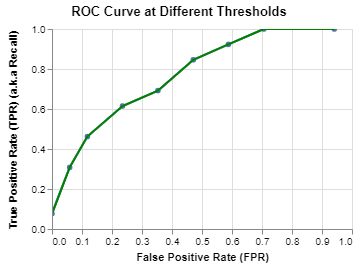

In [14]:
import altair as alt
alt.renderers.enable('notebook')

base = alt.Chart(df_roc, 
                 title='ROC Curve at Different Thresholds'
                ).properties(width=300)

roc_curve = base.mark_line(point=True).encode(
    alt.X('FPR', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('TPR', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(
    x='FPR',
    y='TPR',
    size=alt.value(2)
)

(roc_curve + roc_rule).interactive()